# AI Chatbot in Python
> Chatbot sederhana ini menggunakan konsep sederhana penerapan Cosine Similarity

> Disini program Chatbot dibuat dengan sesuai kebutuhan pengguna, jadi kita bisa memilih apakah harus membuat program ini bisa bekerja pada topik tertentu, misalnya untuk Chatbot berbasis Covid-19, atau yang lainnya yang sedang relevan.

In [ ]:
#sumber materi : https://towardsdatascience.com/making-a-simple-and-fast-chatbot-in-10-minutes-2d84a4ba35e
#https://youtu.be/9KZwRBg4-P0

# Tools scraping Artikel

Pada program kali ini kita akan mengambil teks dari internet menggunakan tools newspaper3k, dimana tools ini memiliki beberapa kelebihan yaitu:
1. Kerangka kerja dalam mengunduh artikel yang multi-thread
2. Dapat mengidentifikasi URL baru
3. Mampu mengekstraksi teks dari HTML
4. Terbaik dalam hal ekstraksi gambar dari HTML
5. Mampu mengekstraksi semua gambar dari HTML
6. Dapat mengekstraksi kata kunci dari teks
7. Dapat mengekstrak ringkasan teks
8. Dapat mengekstraksi nama penulis suatu artikel
9. Dapat mengekstraksi istilah yang sedang trend di mesin pencarian Google
10. Dapat bekerja lebih dari 10 bahasa (termasuk Inggris, Jerman, Arab, China, dll)

In [ ]:
!pip install newspaper3k #untuk scraping artikel pada web

     |████████████████████████████████| 211 kB 13.5 MB/s 
     |████████████████████████████████| 87 kB 7.1 MB/s 
     |████████████████████████████████| 7.4 MB 72.8 MB/s 
     |████████████████████████████████| 81 kB 8.2 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=6b87c41694b14a9d4d4402f8592c52a3dc511c145297a04b3a7312cf8f39c672
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=508906356f483fcde59852355a8b975ae672f0c6b56306c1a1873b42b5366fa2
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=53256a057f31086114b4e7c937eb04d6b27bbb4afb339a4cc7e7b7ae678d5540
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

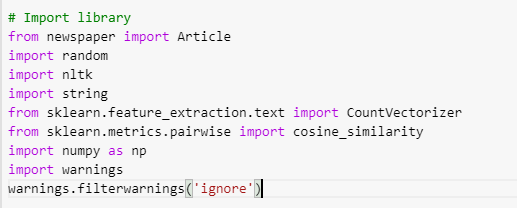

In [ ]:
# Import library
from newspaper import Article
import random #membantu dalam membuat list kata agar chattbot yang dibuat tidak monoton dengan respon jawabannya
import nltk #untuk tokenisasi (library yang menyediakan corpus yang akan kita pakai dalam membuat chattbot)
import string #untuk keperluan data bertype string
from sklearn.feature_extraction.text import CountVectorizer #untuk ekstraksi fitur (atau vektorisasi) 
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np #library Python dasar untuk perhitungan matematis dan ilmiah.
import warnings #mendeteksi program jika terjadi error
warnings.filterwarnings('ignore') #mendeteksi program jika terjadi error

Note:

Untuk menggunakan data tekstual untuk pemodelan prediktif, teks harus diurai untuk menghapus kata-kata tertentu - proses ini disebut **tokenisasi** . Kata-kata ini kemudian perlu dienkode sebagai bilangan bulat, atau nilai floating-point, untuk digunakan sebagai masukan dalam algoritme pembelajaran mesin. Proses ini disebut ekstraksi fitur (atau vektorisasi) .

**Scikit-learn's CountVectorizer** digunakan untuk mengonversi kumpulan dokumen teks menjadi vektor jumlah istilah / token. Ini juga memungkinkan pra-pemrosesan data teks sebelum menghasilkan representasi vektor. Fungsionalitas ini menjadikannya modul representasi fitur yang sangat fleksibel untuk teks.

**Tokenizing**
Tokenizing merupakan proses pemisahan teks atau kalimat menjadi potongan kata yang disebut 
token yang kemudian di analisa. Tokenizing juga dibagi menjadi 2 jenis, yaitu tokenizing kata dan
tokenizing kalimat. Tokenizing kata memisah sebuah kalimat dengan hasil potongan-potongan kata dari kalimat yang dipotong yang kemudian dijadikan token, sedangkan tokenizing kalimat digunakan memisah 
kalimat-kalimat yang ada dalam sebuah paragraf.


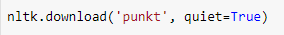

In [ ]:
#ketikkan coding untuk mendowload corpus

True

# Proses 1 (Membuat korpus dengan mendownload artikel dari sebuah link)



**Corpus**, jamak dari corpora; Sebuah koleksi data linguistik, baik disusun sebagai teks-teks tertulis atau sebagai sebuah transkripsi rekaman suara. Tujuan utama dari corpus adalah untuk memverifikasi sebuah hipotesis tentang bahasa - misalnya, untuk menentukan bagaimana penggunaan suara tertentu, kata atau ragam susunan sintaksis. Linguistik Corpus berkaitan dengan prinsip-prinsip dan praktik menggunakan corpora dalam studi bahasa. Korpus komputer adalah bagian besar teks-teks yang dapat dibaca mesin.

(Crystal, David. 1992. An Encyclopedic Dictionary of Language and Languages. Oxford: Blackwell.)

Hal pertama yang perlu kita lakukan untuk bekerja dengan NLTK adalah mengunduh NLTK corpora. Berikut langkah-langkah dalam mendapatkan corpora.

Link dapat diganti dengan link teks berbhasa Indonesia, tetapi kali ini kita mencoba menggunakan teks berbahasa Inggris terlebih dahulu. 

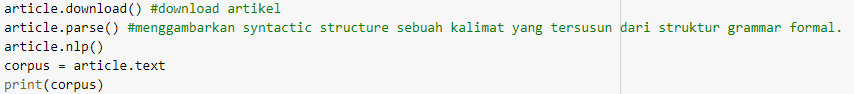

In [ ]:
# Lengkapi ya codingannya dengan perintah diatas!
article = Article('https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521')
#download artikel
#menggambarkan syntactic structure sebuah kalimat yang tersusun dari struktur grammar formal.

Learn more from kidney doctor Andrew Bentall, M.D.

I'm Dr. Andrew Bentall, a kidney doctor at Mayo Clinic. I look after patients with kidney disease, either in the early stages, or with more advanced kidney disease considering dialysis and transplantation as treatment options. In this video, we'll cover the basics of chronic kidney disease. What is it? Who gets it? The symptoms, diagnosis and treatment. Whether you are looking for answers for yourself or for someone you love, we're here to give you the best information available.

Chronic kidney disease is a disease characterized by progressive damage and loss of function in the kidneys. It's estimated that chronic kidney disease affects about one in seven American adults. And most of those don't know they have it. Before we get into the disease itself, let's talk a little bit about the kidneys and what they do. Our kidneys play many important roles keeping our bodies in balance. They remove waste and toxins, excess water from the blo

# Proses 2 (Tokenization)

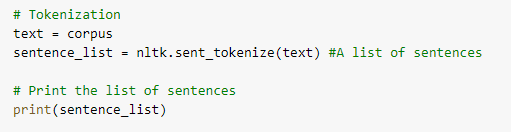

In [ ]:
# Tokenization


# Print the list of sentences



['Learn more from kidney doctor Andrew Bentall, M.D.', "I'm Dr. Andrew Bentall, a kidney doctor at Mayo Clinic.", 'I look after patients with kidney disease, either in the early stages, or with more advanced kidney disease considering dialysis and transplantation as treatment options.', "In this video, we'll cover the basics of chronic kidney disease.", 'What is it?', 'Who gets it?', 'The symptoms, diagnosis and treatment.', "Whether you are looking for answers for yourself or for someone you love, we're here to give you the best information available.", 'Chronic kidney disease is a disease characterized by progressive damage and loss of function in the kidneys.', "It's estimated that chronic kidney disease affects about one in seven American adults.", "And most of those don't know they have it.", "Before we get into the disease itself, let's talk a little bit about the kidneys and what they do.", 'Our kidneys play many important roles keeping our bodies in balance.', 'They remove wast

# Proses 3 (Bot Response)

Bot respon digunakan untuk membuat sebuah percakapan awal antara pengguna dengan bot, jadi disini user dapat menyapa bot, nah untuk kata-kata dapat diganti sesuai dengan kebutuhan, misalnya bahasa indonesia. 

Pada percakapan awal tidak menggunakan ML atau metode lainnya, program hanya menjawab dengan kata yang di cocokkan sebagai input.

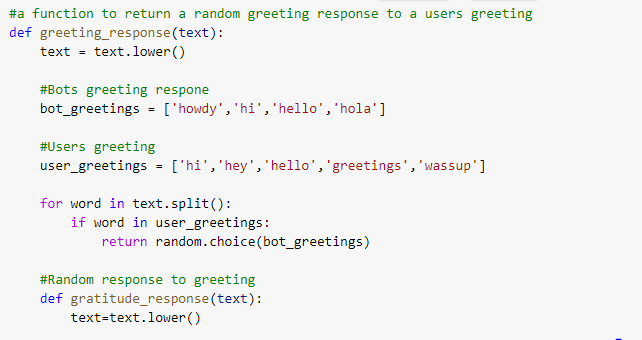

In [ ]:
#a function to return a random greeting response to a users greeting

    
    #Bots greeting respone
    
    
    #Users greeting
    
    
    for word in text.split():
        if word in user_greetings:
            return random.choice(bot_greetings)
        
    #Random response to greeting
    
   


1. Pada list kode bot_greetings itu bentuk kata sapaan bot terhadap sapaan yang kita berikan, dan dapat diganti dengan bahasa Indonesia atau lainnya.
2. Sedangkan, pada list user_greetings itu kata sapaan input dari user dan dapat diganti dengan bahasa lainnya.

# Sorting List

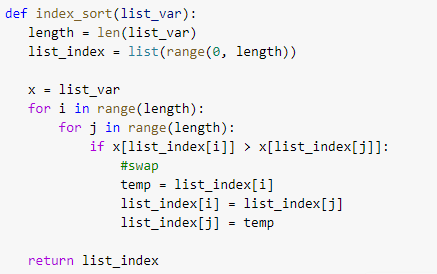

In [ ]:
# Lengkapi ya codingannya dengan code diatas!
 def index_sort(list_var):
    length = len(list_var)
    list_index
                
    return list_index

# Chatbot Respon Menggunakan Cosine Similarity

Pada respon bot menggunakan teknis Cosine Similarity untuk menghitung kata yang cocok dengan yang di input user terhadap respon dari Bot

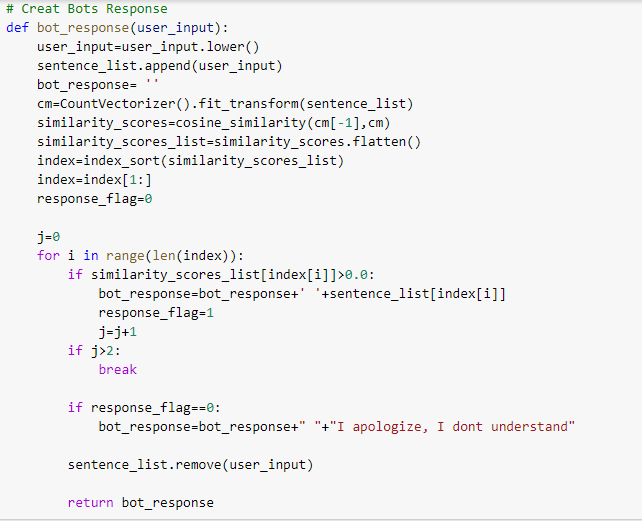

In [ ]:
# Creat Bots Response
def bot_response(user_input):
    user_input=user_input.lower()
    sentence_list.append(user_input)
    bot_response= ''
    cm=CountVectorizer().fit_transform(sentence_list)
    similarity_scores=cosine_similarity(cm[-1],cm)
    similarity_scores_list=similarity_scores.flatten()
    index=index_sort(similarity_scores_list)
    index=index[1:]
    response_flag=0
    
    j=0
    for i in range(len(index)):
        if similarity_scores_list[index[i]]>0.0:
            bot_response=bot_response+' '+sentence_list[index[i]]
            response_flag=1
            j=j+1
        if j>2:
            break

        if response_flag==0:
            bot_response=bot_response+" "+"I apologize, I dont understand"

        sentence_list.remove(user_input) 

        return bot_response

Pada listing kode >bot_response=bot_response+" "+"I apologize, I dont understand" pada list kode ini kata I apologize tujuannya untuk memberikan respon karena sistem tidak mengenali kata yang kita input, jadi sebagai bentuk respon bot kepada user. Kata tersebut bisa diganti dengan bahasa Indonesia, misalnya "Maaf saya tidak mengetahui arti atau tidak mengenali kata-kata yang di input".

# Proses 4 (End Process, Making chat box)

In [ ]:
#Start Chat
print("Doc Bot: I am DOc bot and I will answer your queries about chronic kidney disease, if you want to exit type, bye  ?")

exit_list=['exit','bye','see you later','quit']

while(True):
    user_input=input()
    if user_input.lower() in exit_list:
        print('Doc Bot: Bye Bye See you later')
        break
    else:
        if greeting_response(user_input)!= None:
            print('Doc Bot: '+ greeting_response(user_input))
        else:
            print('Doc Bot: '+ bot_response(user_input))

Doc Bot: I am DOc bot and I will answer your queries about chronic kidney disease, if you want to exit type, bye  ?
halo
Doc Bot:  I apologize, I dont understand
hai
Doc Bot:  I apologize, I dont understand
bye
Doc Bot: Bye Bye See you later


Doc Bot ganti dengan ini atau sesuai dengan topik yang lagi di bahas, print("Doc Bot: Mau nanya apa kamu tentang kabel laut?")

In [ ]:
#buat pertanyaan pada kolom diatas seperti : what is chronic kidney disease?, dll.

---
# AI Chatbot Versi Bahasa **Indonesia**
# Proses 1 (Making Corpus with Download an Article)

In [ ]:
article = Article('https://warstek.com/kabel-laut/')
article.download()
article.parse()
article.nlp()
corpus = article.text
print(corpus)

Telkomsel, Indihome, dan Kabel Laut JaSuKa

Pada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome. Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik fixed maupun mobile broadband di beberapa wilayah Indonesia. Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar. Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan. Netizen pun banyak berkomentar negatif terkait hal ini. Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan.

Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak. Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan. Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat berjalan sebaik mungkin, meski tentu tidak s

# Proses 2 (Tokenization)

In [ ]:
# Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text) #A list of senetences

# Print the list of sentences
print(sentence_list)

['Telkomsel, Indihome, dan Kabel Laut JaSuKa\n\nPada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome.', 'Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik fixed maupun mobile broadband di beberapa wilayah Indonesia.', 'Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar.', 'Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan.', 'Netizen pun banyak berkomentar negatif terkait hal ini.', 'Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan.', 'Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak.', 'Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan.', 'Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat berjalan sebaik m

In [ ]:
#a function to return a random greeting response to a users greeting
def greeting_response(text):
    text = text.lower()
    
    #Bots greeting respone
    bot_greetings = ['halo','hai','yuhuu','*eyebrows up*']
    
    #Users greeting
    user_greetings = ['Haloo','Eh iyaa Haii','Hai','greetings','wassup']
    
    for word in text.split():
        if word in user_greetings:
            return random.choice(bot_greetings)
        
    #Random response to greeting
    def gratitude_response(text):
        text=text.lower()
   


In [ ]:
 def index_sort(list_var):
    length = len(list_var)
    list_index = list(range(0, length))
    
    x = list_var        
    for i in range(length):
        for j in range(length):
            if x[list_index[i]] > x[list_index[j]]:
                #swap
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp
                
    return list_index

In [ ]:
# Creat Bots Response
def bot_response(user_input):
    user_input=user_input.lower()
    sentence_list.append(user_input)
    bot_response= ''
    cm=CountVectorizer().fit_transform(sentence_list)
    similarity_scores=cosine_similarity(cm[-1],cm)
    similarity_scores_list=similarity_scores.flatten()
    index=index_sort(similarity_scores_list)
    index=index[1:]
    response_flag=0
    
    j=0
    for i in range(len(index)):
        if similarity_scores_list[index[i]]>0.0:
            bot_response=bot_response+' '+sentence_list[index[i]]
            response_flag=1
            j=j+1
        if j>2:
            break

        if response_flag==0:
            bot_response=bot_response+" "+"I apologize, I dont understand"

        sentence_list.remove(user_input) 

        return bot_response

# Proses 4 (End Process, Making chat box)

In [ ]:
#Start Chat
print("Doc Bot: Mau nanya apa kamu tentang kabel laut")

exit_list=['exit','bye','keluar','quit', 'sampai jumpa']

while(True):
    user_input=input()
    if user_input.lower() in exit_list:
        print('Doc Bot: Bye Bye Sampai jumpa lagi')
        break
    else:
        if greeting_response(user_input)!= None:
            print('Doc Bot: '+ greeting_response(user_input))
        else:
            print('Doc Bot: '+ bot_response(user_input))

Doc Bot: Mau nanya apa kamu tentang kabel laut
keluar
Doc Bot: Bye Bye Sampai jumpa lagi


In [ ]:
# kabel laut adalah
# kabel laut untuk komunikasi internasional adalah

## Activity (3-5 kelompok dalam 30-60 menit)
- Buatlah bot sederhana dengan topik tertentu. Data (knowledge base) boleh berasal dari mana saja, disesuaikan dengna topik yang ingin diambil. 
- Wajib menggunakan versi Bahasa Inggris dan Bahasa Indonesia.
- Gunakan beberapa artikel agar bot memiliki pengetahuan yang lebih luas.
- Silahkan di improve kode sekreatif kalian agar chatbot memiliki kemampuan yang cukup baik dalam merespon. Gunakan materi atau teknik preprocessing yang sudah kalian pelajari kemarin.
- Buat simulasi pertanyaan dan tampilkan hasilnya (contoh output).
- Jawaban tidak ada yang benar atau yang salah, yang terpenting bot mampu memberi respon yang baik sesuai dengan topik yang dibahas.